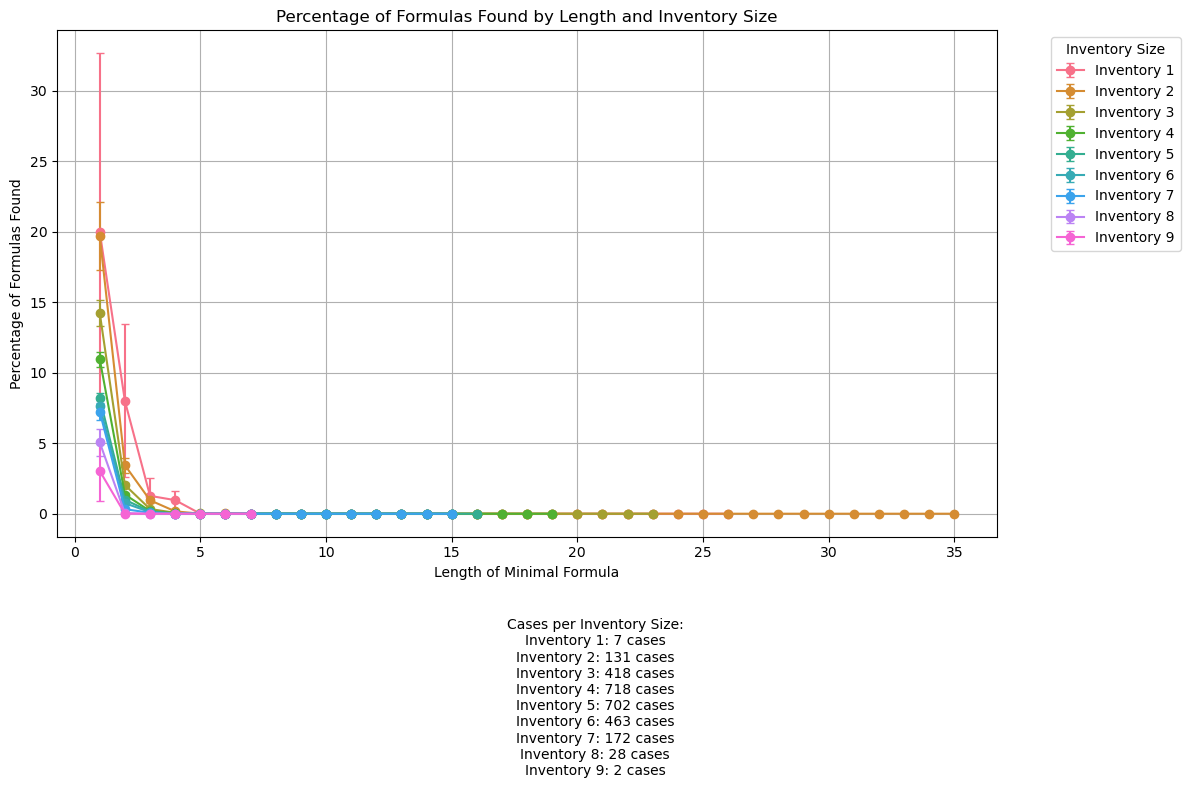

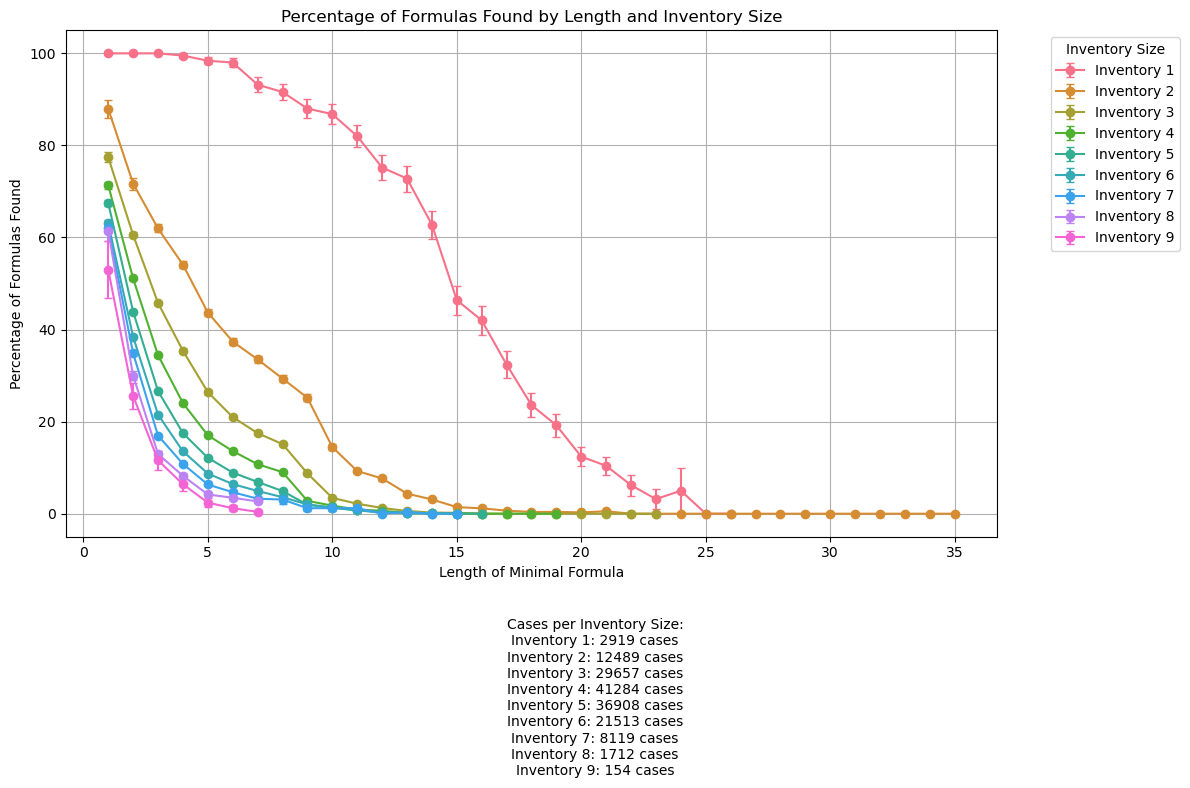

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations

# Load data
df = pd.read_csv('random_results.csv')

# Define operator columns
operator_columns = ['O', 'A', 'N', 'C', 'B', 'X', 'NA', 'NOR', 'NC']

# Compute inventory size
df['inventory_size'] = df[operator_columns].sum(axis=1)

# Add flag for whether a formula was found
df['formula_found'] = df['script_found_formula'].notna()

# Exclude rows where known minimal formula length is 0
df = df[df['length'] > 0]

# Group by inventory size and length
grouped = df.groupby(['inventory_size', 'length']).agg(
    total=('formula_found', 'count'),
    found=('formula_found', 'sum')
).reset_index()

# Compute percentage and standard error (binomial)
grouped['percentage_found'] = 100 * grouped['found'] / grouped['total']
grouped['stderr'] = 100 * np.sqrt(
    (grouped['percentage_found'] / 100) * (1 - grouped['percentage_found'] / 100) / grouped['total']
)

# Plot
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(grouped['inventory_size'].unique()))

for i, (inv_size, group) in enumerate(grouped.groupby('inventory_size')):
    plt.errorbar(
        group['length'],
        group['percentage_found'],
        yerr=group['stderr'],
        label=f'Inventory {inv_size}',
        fmt='-o',
        capsize=3,
        color=palette[i]
    )

plt.title('Percentage of Formulas Found by Length and Inventory Size')
plt.xlabel('Length of Minimal Formula')
plt.ylabel('Percentage of Formulas Found')
plt.legend(title='Inventory Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Only count rows where a formula was found
counts = df[df['formula_found']].groupby('inventory_size').size()

counts_str = "\n".join([f"Inventory {k}: {v} cases" for k, v in counts.items()])

# Place summary below the plot
plt.figtext(0.5, -0.3, f"Cases per Inventory Size:\n{counts_str}", ha='center', fontsize=10)

plt.show()


# Load data
df = pd.read_csv('merged_results.csv')

# Define operator columns
operator_columns = ['O', 'A', 'N', 'C', 'B', 'X', 'NA', 'NOR', 'NC']

# Compute inventory size
df['inventory_size'] = df[operator_columns].sum(axis=1)

# Add flag for whether a formula was found
df['formula_found'] = df['script_found_formula'].notna()

# Exclude rows where known minimal formula length is 0
df = df[df['length'] > 0]

# Group by inventory size and length
grouped = df.groupby(['inventory_size', 'length']).agg(
    total=('formula_found', 'count'),
    found=('formula_found', 'sum')
).reset_index()

# Compute percentage and standard error (binomial)
grouped['percentage_found'] = 100 * grouped['found'] / grouped['total']
grouped['stderr'] = 100 * np.sqrt(
    (grouped['percentage_found'] / 100) * (1 - grouped['percentage_found'] / 100) / grouped['total']
)

# Plot
plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(grouped['inventory_size'].unique()))

for i, (inv_size, group) in enumerate(grouped.groupby('inventory_size')):
    plt.errorbar(
        group['length'],
        group['percentage_found'],
        yerr=group['stderr'],
        label=f'Inventory {inv_size}',
        fmt='-o',
        capsize=3,
        color=palette[i]
    )

plt.title('Percentage of Formulas Found by Length and Inventory Size')
plt.xlabel('Length of Minimal Formula')
plt.ylabel('Percentage of Formulas Found')
plt.legend(title='Inventory Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Only count rows where a formula was found
counts = df[df['formula_found']].groupby('inventory_size').size()

counts_str = "\n".join([f"Inventory {k}: {v} cases" for k, v in counts.items()])

# Place summary below the plot
plt.figtext(0.5, -0.3, f"Cases per Inventory Size:\n{counts_str}", ha='center', fontsize=10)
plt.show()






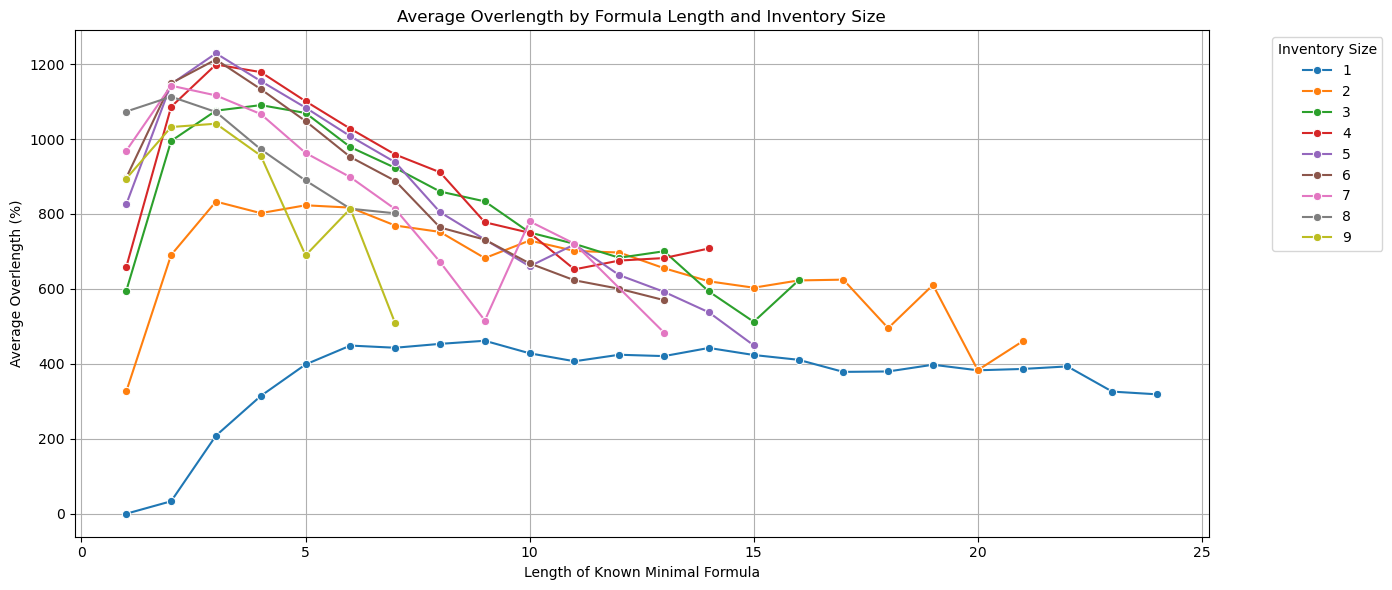

In [18]:
# Define operator columns
operator_columns = ['O', 'A', 'N', 'C', 'B', 'X', 'NA', 'NOR', 'NC']

# Compute inventory size
df['inventory_size'] = df[operator_columns].sum(axis=1)

# Filter out rows where length == 0, but keep rows with overlength == 0.0
df = df[(df['length'] > 0) & df['script_overlength_percent'].notna()]

# Group by length and inventory_size
grouped = df.groupby(['length', 'inventory_size']).agg(
    avg_overlength=('script_overlength_percent', 'mean'),
    count=('script_overlength_percent', 'count')
).reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=grouped,
    x='length',
    y='avg_overlength',
    hue='inventory_size',
    marker='o',
    palette='tab10'
)

plt.title('Average Overlength by Formula Length and Inventory Size')
plt.xlabel('Length of Known Minimal Formula')
plt.ylabel('Average Overlength (%)')
plt.legend(title='Inventory Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


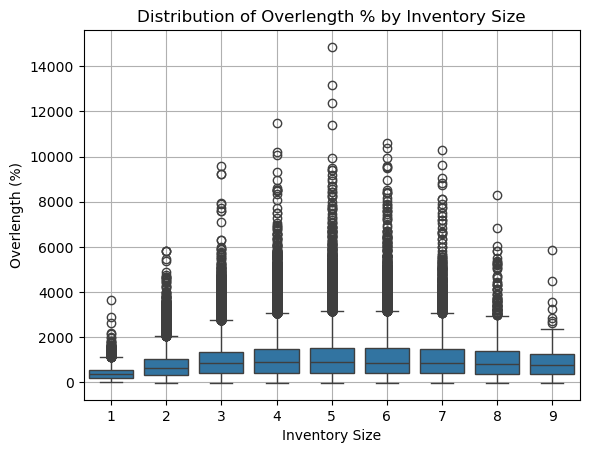

In [20]:
sns.boxplot(data=df[df['formula_found']], x='inventory_size', y='script_overlength_percent')
plt.title("Distribution of Overlength % by Inventory Size")
plt.xlabel("Inventory Size")
plt.ylabel("Overlength (%)")
plt.grid(True)
plt.show()


/tmp/ipykernel_10184/3854155844.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=op_ov_df, x='Operator', y='AvgOverlength', palette='mako')


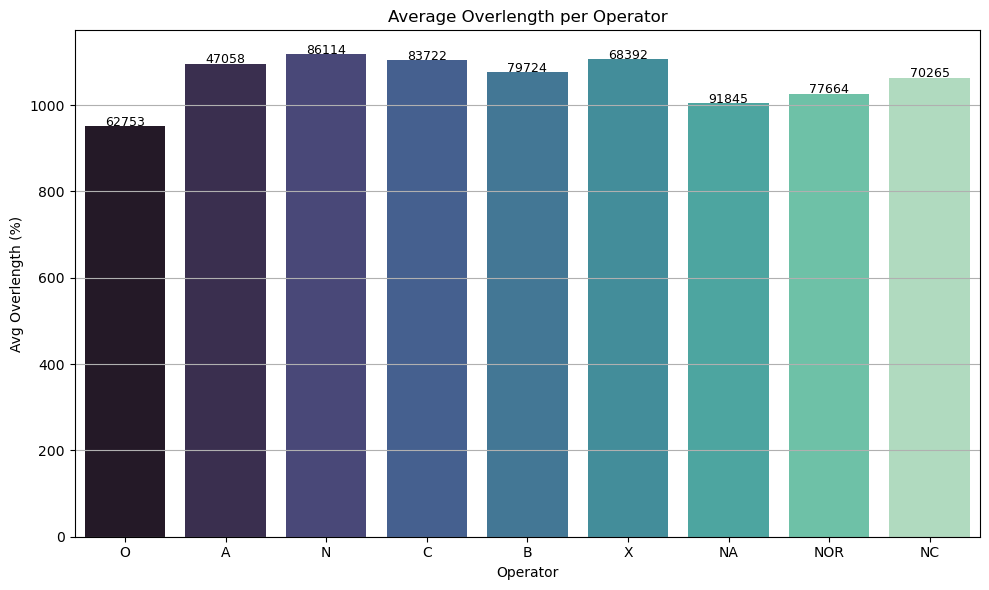

In [23]:
# Compute average overlength when operator is used
operator_overlength = []

for op in operator_columns:
    subset = df[(df[op] == 1) & (df['formula_found'])]
    if not subset.empty:
        avg_ov = subset['script_overlength_percent'].mean()
        operator_overlength.append((op, avg_ov, len(subset)))

op_ov_df = pd.DataFrame(operator_overlength, columns=['Operator', 'AvgOverlength', 'Cases'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=op_ov_df, x='Operator', y='AvgOverlength', palette='mako')

for i, row in op_ov_df.iterrows():
    plt.text(i, row.AvgOverlength + 1, f"{int(row.Cases)}", ha='center', fontsize=9)

plt.title("Average Overlength per Operator")
plt.ylabel("Avg Overlength (%)")
plt.xlabel("Operator")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


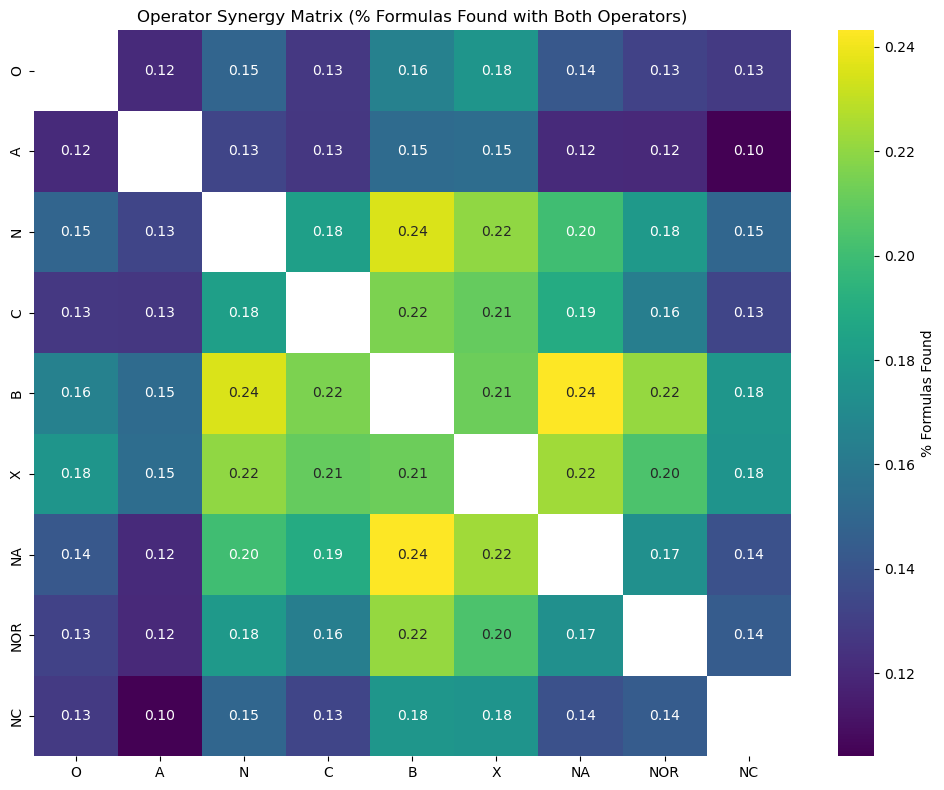

In [5]:
df = pd.read_csv('merged_results.csv')

# Create inventory size and formula found flags
df['inventory_size'] = df[operator_columns].sum(axis=1)
df['formula_found'] = df['script_found_formula'].notna()

# 2. Operator Synergy Matrix (pairwise success rates)
op_synergy = pd.DataFrame(index=operator_columns, columns=operator_columns, dtype=float)

for op1, op2 in combinations(operator_columns, 2):
    subset = df[(df[op1] == 1) & (df[op2] == 1)]
    if len(subset) > 0:
        success_rate = subset['formula_found'].mean()
        op_synergy.loc[op1, op2] = success_rate
        op_synergy.loc[op2, op1] = success_rate

# Fill diagonal with NaNs 
np.fill_diagonal(op_synergy.values, np.nan)



# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(op_synergy, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': '% Formulas Found'})
plt.title("Operator Synergy Matrix (% Formulas Found with Both Operators)")
plt.tight_layout()
plt.show()



/tmp/ipykernel_13995/60713944.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_inventory, x='inventory_label', y='success_rate', palette='magma')


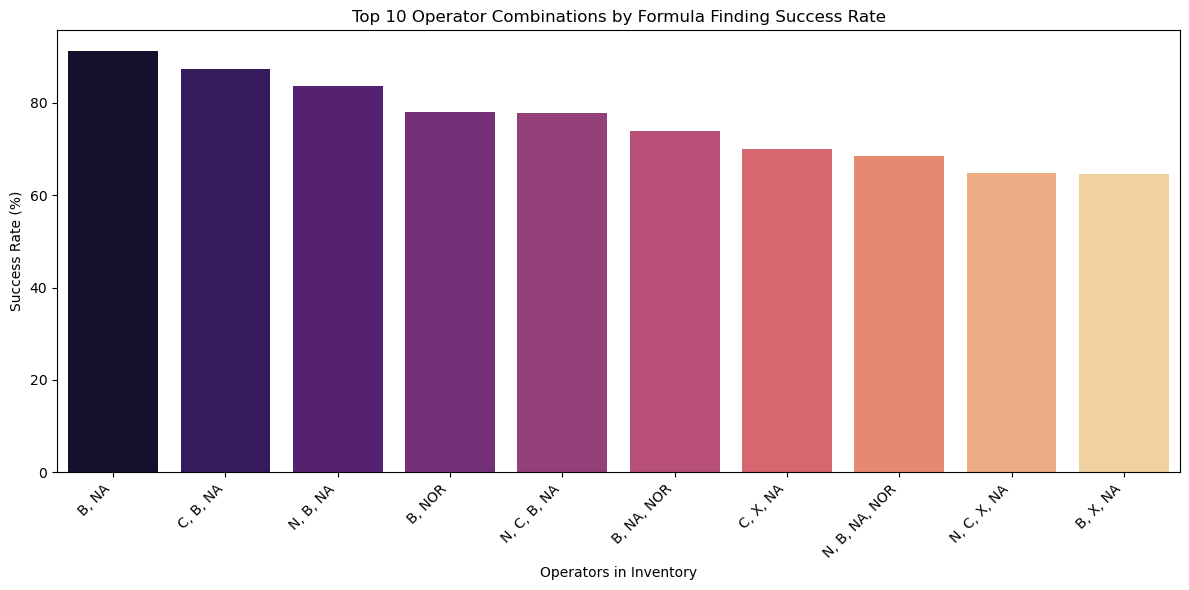

In [7]:
# Compute inventory key (as a list of operator names)
df['inventory_key'] = df[operator_columns].apply(
    lambda row: tuple(op for op, val in zip(operator_columns, row) if val == 1),
    axis=1
)

# Compute formula found flag
df['formula_found'] = df['script_found_formula'].notna()

# Group by inventory_key and compute success rate
inventory_performance = df.groupby('inventory_key')['formula_found'].agg(['count', 'sum']).reset_index()
inventory_performance = inventory_performance[inventory_performance['count'] > 10]
inventory_performance['success_rate'] = 100 * inventory_performance['sum'] / inventory_performance['count']

# Select top 10
top_inventory = inventory_performance.sort_values('success_rate', ascending=False).head(10)

# Format inventory key for display
top_inventory['inventory_label'] = top_inventory['inventory_key'].apply(lambda x: ', '.join(x))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_inventory, x='inventory_label', y='success_rate', palette='magma')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Success Rate (%)")
plt.xlabel("Operators in Inventory")
plt.title("Top 10 Operator Combinations by Formula Finding Success Rate")
plt.tight_layout()
plt.show()